<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/02_data/06_project_data_processing/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2019 Google LLC.

In [79]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dataset Exploration


For this project you will be given a dataset and an associated problem. Over the course of the day, you will explore the dataset and train the best model you can in order to solve the problem. At the end of the day, you will give a short presentation about your model and solution.

### Deliverables

1. A **copy of this Colab notebook** containing your code and responses to the ethical considerations below.
1. At the end of the day, we will ask you and your group to stand in front of the class and give a brief **presentation about what you have done**. 

## Team

Please enter your team members' names in the placeholders in this text area:

*   *N'kira Brooks*
*   *Lizbet Rivera*
*   Steve Liang



# Exercises

## Exercise 1: Coding

[Kaggle](http://www.kaggle.com) hosts a [dataset containing US airline on-time statistics and delay data](https://www.kaggle.com/giovamata/airlinedelaycauses) from the [US Department of Transportation's Bureau of Transportation Statistics (BTS)](https://www.bts.gov/). In this project, we will **use flight statistics data to gain insights into US airports' and airlines' flights in 2008.**

You are free to use any toolkit we've covered in class to solve the problem (e.g. Pandas, Matplotlib, Seaborn).

Demonstrations of competency:
1. Get the data into a Python object.
1. Inspect the data for each column's data type and summary statistics.
1. Explore the data programmatically and visually.
1. Produce an answer and visualization, where applicable, for at least three questions from the list below, and discuss any relevant insights. Feel free to generate and answer some of your own questions. 

  * Which U.S. airport is the busiest airport? You can decide how you'd like to measure "business" (e.g., annually, monthly, daily).
    * ['ATL'] is the busiest airport.
  * Of the 2008 flights that are *actually delayed*, think about:
    * Which 10 U.S. airlines have the most delays?
    * Answer: Top 10 U.S. airlines have the most delays:
      * ['WN', 'AA', 'MQ', 'UA', 'OO', 'DL', 'XE', 'CO', 'US', 'EV']
    * Which 10 U.S. airports have the most delays? Steve
      * ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW']
  * More analysis:
    * Are there patterns on how flight delays are distributed across different hours of the day?
    * How about across months or seasons? Can you think of any reasons for these seasonal delays?
    * Add reason for delay to your delay analysis above.
    

### Student Solution

In [80]:
#Remember to upload the .csv to under /content

### import libraries

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data to Dataframe

In [82]:
flight_df = pd.read_csv('DelayedFlights.csv')
flight_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Inspect Data

In [83]:
#inspect data
flight_df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

### Cleaning Data

In [84]:
#clean data section
#delay_list = ['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay',	'LateAircraftDelay']
delay_list = ['ArrDelay', 'DepDelay']
for i in range(len(delay_list)):
  flight_df.loc[flight_df[delay_list[i]] < 0 & flight_df[delay_list[i]].isnull(), delay_list[i]] = 0.0
flight_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,0.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Codes to Analyze Delays

##### Top 10 Airlines with Most Delays

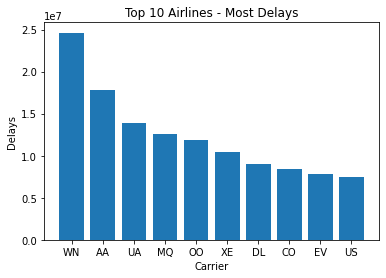

Top 10 Airlines have the most delay: ['WN', 'AA', 'UA', 'MQ', 'OO', 'XE', 'DL', 'CO', 'EV', 'US']


In [90]:
#airlines

delay_df = pd.DataFrame(flight_df[['ArrDelay', 'DepDelay']])
delay_df['Carrier'] = flight_df['UniqueCarrier']
delay_df['Sum'] = flight_df['ArrDelay'] + flight_df['DepDelay']
df = pd.DataFrame(delay_df)
df = pd.pivot_table(delay_df, index=['Carrier'],values=['Sum'],aggfunc='sum')

#print(delay_df[delay_df['Carrier'] == 'CO'])
airline_head = df['Sum'].sort_values(ascending=False).head(10)
#top_ten_delay = delay_df.loc[df.index, 'Carrier'].unique()[:10].tolist()
ret = (airline_head.index).tolist()

plt.bar(ret, airline_head.values)
plt.title('Top 10 Airlines - Most Delays')
plt.xlabel('Carrier')
plt.ylabel('Delays')
plt.show()

print("Top 10 Airlines have the most delay: {0}".format(ret))

##### Top 10 Airports with Most Delays

In [86]:
#airports
delay_df = pd.DataFrame(flight_df[['ArrDelay', 'DepDelay', 'UniqueCarrier', 'Origin']])
delay_df = delay_df.set_index('Origin')
airline_most_df = delay_df.groupby('Origin')[['DepDelay', 'ArrDelay']].count().sort_values(by='DepDelay', ascending = False)  #.head(10)
airline_most_df['Sum'] = airline_most_df['DepDelay'] + airline_most_df['ArrDelay']

airline_most_df['Sum'].head(10).index.tolist()

print("Top 10 Airlines have the most delay: {0}".format(airline_most_df['Sum'].head(10).index.tolist()))

Top 10 Airlines have the most delay: ['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW']


### Codes to Analyze Delays Across Seasons

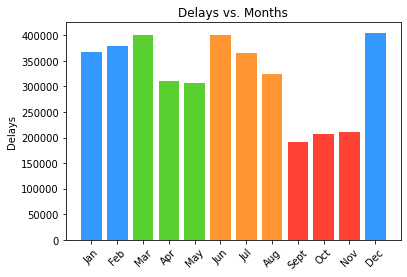

In [87]:
delay_df = pd.DataFrame(flight_df[['ArrDelay', 'DepDelay', 'Month']])
delay_df =delay_df.set_index('Month')
month_df = delay_df.groupby('Month')[['DepDelay', 'ArrDelay']].count().sort_values(by='Month')  #.head(10)
month_df['Total Delay'] = month_df['DepDelay'] + month_df['ArrDelay']

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
colors = ['#3399FF', '#3399FF', '#59D030', '#59D030', '#59D030', '#FF9633', '#FF9633', '#FF9633', '#FF4233', '#FF4233', '#FF4233', '#3399FF']

plt.bar(month_df.index, month_df['Total Delay'], color=colors)
plt.xticks(month_df.index, months, rotation = 45)


plt.ylabel('Delays')
plt.title('Delays vs. Months')
plt.show()

### Codes to Analyze the Busiest Airports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
outs = flight_df.groupby(flight_df['Origin']).size().reset_index(name = 'delays')
outs_pd = outs.sort_values(by="delays", ascending=False)
outs_pd.head()

#plt.bar(outs['Origin'], outs_pd['delays'])
#plt.xlabel('Carriers')
#print(outs_pd['delays'])
#plt.show()

,Origin,delays
18,ATL,131613
210,ORD,125979
81,DFW,95414
80,DEN,74323
157,LAX,58772


## Exercise 2: Ethical Implications

Even the most basic of data manipulations has the potential to affect segments of the population in different ways. It is important to consider how your code might positively and negatively affect different types of users.

In this section of the project, you will reflect on the ethical implications of your analysis.

### Student Solution

**Positive Impact**

*Response: The main problem we analynzed is about which airlines and airports have the most delays. When passengers are informed about which top 10 airlines and airports are, they will have reference to pick which airports they will go for when they order the flight tickets. Nevertheless, as the flight companies get to know the most delay airlines and airports, they will come up with plans to distribute airlines to different airports based on the result we concluded from the data frame.*

**Negative Impact**

*Response: Due to the size and diversity of the data from data source, the conclusion from the data we obtain may have deviations. The faulty conclusion based on the data will cause negative impact to both the airlines and the airports if they come up with the strategies to deal with the delays.*

**Bias**

Data analysis can be biased for many reasons. The bias can come from the data itself (e.g. sampling, data collection methods, available sources), and from the interpretation of the analysis outcome.

Think of at least two ways that bias might have been introduced to your analysis and explain them below.

*Response: One source of bias in the analysis could be: Once source of bias in the analysis could be the focus on all arrival and departure delays without taking into account whether or not the plane landed at or before it's scheduled time. (Reporting Bias)*

*Response: Another source of bias in the analysis could be the raw data contains many NaN under many columns and that our team decided to turn all the occurance of NaN into 0.0. This will clean up the data but at the same time the final results might be skewed, which could cause bias. (Selection Bias/Non-response Bias)*

**Changing the Dataset to Mitigate Bias**

The most common way that an analysis is biased is when the dataset itself is biased. Look back at the input data that you used for your analysis. Think about how you might change something about the data to reduce bias in your model.

What changes could you make to make your dataset less biased? Consider the data that you have, how and where that data was collected, and what other sources of data might be used to reduce bias.

Write a summary of the changes that could be made to your input data.

*Reponse: Since the data that was collected mainly focuses on there being any type of delay it doesn't account for the events in which a flight is delayed, but arrives on time or earlier than scheduled. To account for this, the arrival time and scheduled arrival time could be compared against one another, and on the occasion that the flight has a arrival time earlier than that of it's schedule or equal, then the delay for that airline or airport would not be included in the data.*

**Changing the Analysis Questions to Mitigate Bias**

Are there any ways to reduce bias by changing the analysis itself? This could include modifying the choice of questions you ask, the approach you take to answer the questions, etc.

Write a brief summary of any changes that you could make to help reduce bias in your analysis.

*Reponse: Are there any ways to reduce bias by changing the analysis itself? This could include modifying the choice of questions you ask, the approach you take to answer the questions, etc.
Write a brief summary of any changes that you could make to help reduce bias in your analysis.
SSince the analysis has potential bias that we could adjust, due to other other data that is excluded from the data we are analyzing. To reduce bias, we could take the data from international flights as well to answer the questions that could mitigate bias. International flights have an impact on delays and arrivals as well as popularity among airlines and U.S airports. Another change would be the size of the airports in the data frame, this data would reduce bias as we could take the information given and relate it to the rest of the analysis itself to prove our answer.*

**Mitigating Bias Downstream**

While analysis can point to suggestions, it is people who make decisions based on them. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your analysis to reduce the bias? Describe these below.

*Response: While analysis can point to suggestions, it is people who make decisions based on them. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your analysis to reduce the bias? Describe these below.
Experience both as in the system and outside the system would be implemented as part of the process for how people should interpret the analysis. It’s important to be able to relate to the information from not only one point of view but from at least two.  They too should not only focus on what they know or have experienced but also on what others have gone through, that’s where there is a connection when it comes to interpreting the data and bias would be greatly reduced.*